# 🚗 **`USED CARS PRICE PREDICTION`** 

# `Business Problem Understanding`

>**Context**

Syarah is an online marketplace for buying and selling cars in Saudi Arabia ([entrepreneur](https://www.entrepreneur.com/en-ae/finance/saudi-arabia-based-online-cars-marketplace-syarah-raises/314901)). So, we can say that there are 3 parties in the business process (Sellers - Syarah - Buyers). Sellers advertise cars they want to sell through Syarah, and buyers buy used cars advertised through Syarah. 

Sellers advertise their cars by define the specifications and price. Sometimes, it will be difficult for the seller who don't know about price range in the market. Because it could be that the seller sets a price that is too low (underpriced) or too high (overpriced) than the price should be. If underpriced, then Sellers will get inappropriate profit. Meanwhile, if overpriced, it may lead to the cars is hard to sold.

>**Problem Statement**

Based on context, as a Business owner, Syarah, also will affected by those problem. If overpriced, buyers will decrease, so the company profit also decrease. As time goes by, sellers will don't want to advertise their cars thorugh Syarah due to low buyers/visitor. If underpriced, company will only get small profit (proportion of sales) due to small price. So we can conclude that the problems is: **How's Syarah can help sellers to determine the right price?**

>**Goals**

With the problem above, we can determine our goals (solution) as: **Provides car price prediction by minimizing errors so that it is not overpriced and underpriced**

>**Project Stakeholder**

Stakeholder who will use the solution is **Sellers in Syarah**

>**Analytics Approach**

We will use **Regression Model** as method to achieve the goal. 

Regression is a type of Machine learning which helps in finding the relationship between independent and dependent variable. In simple words, Regression can be defined as a Machine learning problem where we have to predict discrete values like price, Rating, Fees, etc ([Raghav Agrawal](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)).

>**Metrics Evaluation**

Evaluation metrics are quantitative measures used to assess the performance and effectiveness of a statistical or machine learning model. These metrics provide insights into how well the model is performing and help in comparing different models or algorithms ([Tavish Srivastava](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/#:~:text=Evaluation%20metrics%20are%20quantitative%20measures,comparing%20different%20models%20or%20algorithms.)).

Regression machine learning models have various metrics such as MAE, MAPE, and R-squared.
* **Mean Absolute Error(MAE)** is a very simple metric which calculates the absolute difference between actual and predicted values ([Raghav Agrawal](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)).
* **Mean Absolute Percentage Error (MAPE)** measures the precision of the forecasts by showing the average percent difference between forecasts and actual activities regardless of whether the individual forecasts were too high or too low. A MAPE less than 5% is considered as an indication that the forecast is acceptably accurate. A MAPE greater than 10% but less than 25% indicates low, but acceptable accuracy and MAPE greater than 25% very low accuracy, so low that the forecast is not acceptable in terms of its accuracy ([Swanson, David A](https://escholarship.org/content/qt1f71t3x9/qt1f71t3x9.pdf?t=o5wul1#:~:text=A%20MAPE%20less%20than%205,in%20terms%20of%20its%20accuracy.)).
* **R squared (R²)** is a popular metric for identifying model accuracy. It tells how close are the data points to the fitted line generated by a regression algorithm. A larger R squared value indicates a better fit. This helps us to find the relationship between the independent variable towards the dependent variable. R² score ranges from 0 to 1. The closest to 1 the R², the better the regression model is. If R² is equal to 0, the model is not performing better than a random model ([Shweta Goyal](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af#:~:text=R%20squared%20is%20a%20popular,variable%20towards%20the%20dependent%20variable.)).

# `Data Understanding`

The dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.

Features
-	**Type**: Type of used car.
-	**Region**: The region in which the used car was offered for sale.
-	**Make**: The company name.
-	**Gear_Type**: Gear type size of used car.
-	**Origin**: Origin of used car.
-	**Options**: Options of used car.
-	**Year**: Manufacturing year.
-	**Engine_Size**: The engine size of used car.
-	**Mileage**: Mileage of used car	
-	**Negotiable**: True if the price is 0, that means it is negotiable.
-	**Price**: Used car price.

In [1]:
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot

# additional lib
import function as fn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 2000)

In [2]:
# load data
df = pd.read_csv(r'D:\PURWADHIKA\PLAYGROUND\PYTHON\Modul 3\Capstone\Saudi Arabia Used Cars\data\processed\clean_data.csv')
df.head()

,index,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
1,2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
2,3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
3,5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
4,6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [3]:
# q1, q2, q3 = df['Price'].quantile([0.25, 0.5, 0.75])
# iqr = q3-q1
# lowBound = q1-1.5*iqr
# upBound =  q3+1.5*iqr

In [4]:
# df = df[df['Price'] <= upBound]

# `Modeling`

In [5]:
# Model Algorithm (modeling)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm

# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error, r2_score

# pycaret
import pycaret

### **Splitting**

In [6]:
# divide feature and target

target = 'Price'
feature = df.drop(columns=target).columns

display(target, feature)

'Price'

Index(['index', 'Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options',
       'Year', 'Engine_Size', 'Mileage'],
      dtype='object')

In [7]:
# data spliting

train, test = train_test_split(
    df,
    test_size = 0.20,
    random_state = 7
)

print(train.shape, test.shape)

(2992, 11) (748, 11)


### **Encoding**

In [8]:
cat = df.select_dtypes(object).columns

# check initial info of data
pd.DataFrame({
    'column': df[cat].columns.values,
    'type': df[cat].dtypes.values,
    'n_unique': df[cat].nunique().values,
    'min': df[cat].min().values,
    'max': df[cat].max().values,
    'sample_unique': [df[col].sort_values().unique() for col in df[cat].columns]
})

,column,type,n_unique,min,max,sample_unique
0,Type,object,317,2,i40,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5008, 6, 911, A, A3, A4, A5, A6, A7, A8, APV, ASX, ATS, Abeka, Acadia, Accent, Accord, Altima, Armada, Attrage, Aurion, Avalon, Avante, Avanza, Aveo, Azera, Azkarra, B50, Beetle, Bentayga, Blazer, Bus County, Bus Urvan, C, C200, C300, CC, CL, CLA, CLS, CRV, CS35, CS35 Plus, CS75, CS85, CS95, CT-S, CT4, CT5, CT6, CX3, CX5, CX7, CX9, Cadenza, Cadillac, Camargue, Camaro, Camry, Caprice, Carens, Carenz, Carnival, Cayenne, Cayenne S, Cayenne Turbo, Cayman, Cerato, Challenger, Charger, Cherokee, Ciocca, City, Civic, Coaster, Colorado, Compass, Coolray, Copper, Cores, Corolla, Countryman, Coupe, Coupe S, Cressida, Creta, Cruze, D'max, D-MAX, DB9, Daily, ...]"
1,Region,object,27,Abha,Yanbu,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, Al-Namas, Arar, Aseer, Besha, Dammam, Hafar Al-Batin, Hail, Jazan, Jeddah, Jubail, Khobar, Makkah, Najran, Qassim, Qurayyat, Riyadh, Sabya, Sakaka, Tabouk, Taef, Wadi Dawasir, Yanbu]"
2,Make,object,56,Aston Martin,Škoda,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadillac, Changan, Chery, Chevrolet, Chrysler, Classic, Daihatsu, Dodge, FAW, Ferrari, Fiat, Ford, Foton, GAC, GMC, Geely, Genesis, Great Wall, HAVAL, Honda, Hummer, Hyundai, INFINITI, Isuzu, Iveco, Jaguar, Jeep, Kia, Land Rover, Lexus, Lifan, Lincoln, MG, MINI, Maserati, Mazda, Mercedes, Mercury, Mitsubishi, Nissan, Other, Peugeot, Porsche, Renault, Rolls-Royce, Suzuki, Toyota, Victory Auto, Volkswagen, Zhengzhou, Škoda]"
3,Gear_Type,object,2,Automatic,Manual,"[Automatic, Manual]"
4,Origin,object,4,Gulf Arabic,Unknown,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,3,Full,Standard,"[Full, Semi Full, Standard]"


In [9]:
ct = ColumnTransformer([
    ('One Hot Encoder', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('Binary Encoder', ce.TargetEncoder(), ['Type', 'Region', 'Make'])
], remainder='passthrough')

### **Benchmark Model**

In [10]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=7)
rf = RandomForestRegressor(random_state=7)
xgb = XGBRegressor(random_state=7)

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

models = {
    'LinearRegression': log_lr,
    'KNeighborsRegressor': log_knn,
    'DecisionTreeRegressor': log_dt,
    'RandomForestRegressor': log_rf,
    'XGBRegressor': log_xgb
    }

result = []

for name, est in models.items():
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=7)

    estimator = Pipeline([
        ('preproces', ct),
        ('model', est)
    ])

    # MAE
    mae = cross_val_score(
        estimator, 
        train[feature], 
        train[target], 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
        )

    # MAPE
    mape = cross_val_score(
        estimator, 
        train[feature], 
        train[target], 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error'
        )

    # RMSLE
    rmsle = cross_val_score(
        estimator, 
        train[feature], 
        train[target], 
        cv = crossval, 
        scoring = 'neg_mean_squared_log_error'
        )

    # R2
    r2  =  cross_val_score(
        estimator, 
        train[feature], 
        train[target], 
        cv = crossval, 
        scoring = 'r2'
        )
    
    # Adjusted R2
    res = []
    for val in r2:
        res.append(fn.adj_r2(val, len(train), len(feature)))

    # Collect Result
    result.append(
        {
            'Model': name,
            'MAE': abs(mae.mean()),
            'MAPE': abs(mape.mean()),
            'RMSLE': abs(rmsle.mean()),
            'r2':r2.mean(),
            'Adj-r2':np.array(res).mean()
        }
    )

resultDf = pd.DataFrame(result).set_index('Model')

In [11]:
resultDf.sort_values(by='MAE')\
    .style\
    .highlight_max(subset=['r2','Adj-r2'], color = 'yellow', axis = 0)\
    .highlight_min(subset=['MAE','MAPE','RMSLE'], color = 'yellow', axis = 0)

,MAE,MAPE,RMSLE,r2,Adj-r2
Model,,,,,
XGBRegressor,14273.889636,0.197898,0.074877,0.821826,0.821228
RandomForestRegressor,15105.067760,0.217495,0.094434,0.776950,0.776201
DecisionTreeRegressor,20175.741485,0.302191,0.159126,0.668320,0.667208
LinearRegression,22910.638738,0.322218,0.169946,0.608736,0.607423
KNeighborsRegressor,27651.671117,0.471838,0.287991,0.540073,0.538530


### **Test Model**

In [12]:
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

models = {
    'XGBRegressor': log_xgb
}

for name, est in models.items():

    model = Pipeline([
        ('preprocessing', ct),
        ('model', est)
        ])

    model.fit(train[feature], train[target])
    pred = model.predict(test[feature])
    mae = mean_absolute_error(test[target], pred)
    mape = mean_absolute_percentage_error(test[target], pred)
    rmsle = mean_squared_log_error(test[target], pred, squared = False)
    r2 = r2_score(test[target], pred)
    adj_r2 = fn.adj_r2(r2, len(test), len(feature))

score_bt = pd.DataFrame({'MAE': mae, 
                        'MAPE': mape, 
                        'RMSLE': rmsle,  
                        'r2': r2,
                        'Adj-r2': adj_r2}, 
                        index=models.keys())

# create dataframe for residual analysis
df_log_xgb = pd.DataFrame({'act':test[target],
                            'pred':pred
                        })

df_log_xgb['diff'] = df_log_xgb['act']-df_log_xgb['pred']

In [13]:
pd.concat([resultDf.loc[['XGBRegressor']],score_bt])

,MAE,MAPE,RMSLE,r2,Adj-r2
XGBRegressor,14273.889636,0.197898,0.074877,0.821826,0.821228
XGBRegressor,13252.274733,0.188404,0.282932,0.844874,0.842770


### **Hyperparameter Tuning**

In [14]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))
# Learning rate
learning_rate = list(np.arange(1, 100)/100)
# Jumlah pohon
n_estimators = list(np.arange(100, 1100,100))
# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)
# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya
# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0, 11)/10)
# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# # Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [15]:
for key, val in hyperparam_space_xgb.items():
    print(key, val)

model__max_depth [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
model__learning_rate [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
model__n_estimators [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
model__subsample [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
model__gamma [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
model__colsample_bytree [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
model__reg_alpha [0.001, 0.0027825594022071257, 0.007742636826811269, 0.02154434690031883

In [16]:
estimator_xgb = Pipeline([
        ('preprocessing', ct),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=7)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Optimisasi berdasarkan MAE, agar menurunkan tingkat kerugian penjualan
    random_state = 7  
)

In [17]:
random_xgb.fit(train[feature], train[target])

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot '
                                                                               'Encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary '
                                                                               'Encoder',
                                                                               TargetEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('model',
                                              XGBRegressor(base_score=Non...
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=7, refit='neg_mean_absolute_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [18]:
print('Extreme Gradient Boost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

Extreme Gradient Boost
Best_score: -14101.830819771276
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 600, 'model__max_depth': 9, 'model__learning_rate': 0.05, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


### **Test Model - After Tuning**

In [19]:
xgb_tune = TransformedTargetRegressor(random_xgb.best_estimator_, func=np.log, inverse_func=np.exp)

xgb_tune.fit(train[feature], train[target])

pred = xgb_tune.predict(test[feature])

mae = mean_absolute_error(test[target], pred)
mape = mean_absolute_percentage_error(test[target], pred)
rmsle = mean_squared_log_error(test[target], pred, squared = False)
r2 = r2_score(test[target], pred)
adj_r2 = fn.adj_r2(r2, len(test), len(feature))

score_at = pd.DataFrame({'MAE': mae, 
                        'MAPE': mape, 
                        'RMSLE': rmsle,  
                        'r2': r2,
                        'Adj-r2': adj_r2}, 
                        index=['XGBRegressor-AT'])

In [20]:
pd.DataFrame(score_at)

,MAE,MAPE,RMSLE,r2,Adj-r2
XGBRegressor-AT,18968.582043,0.247461,0.343288,0.674428,0.67001


### **Model Evaluation**

#### **Normalities**

In [21]:
from scipy.stats import shapiro

stat, pval = shapiro(df_log_xgb['diff'])

if pval < 0.05:
    print("Distribution Not Normal")
else:
    print("Distribution Normal")

Distribution Not Normal


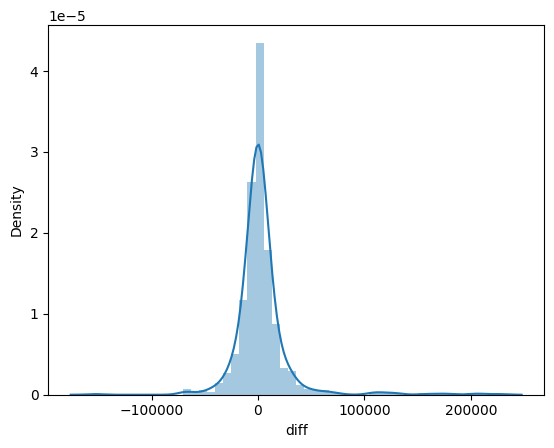

In [22]:
sns.distplot(df_log_xgb['diff']);

#### **Homoscedasticity**

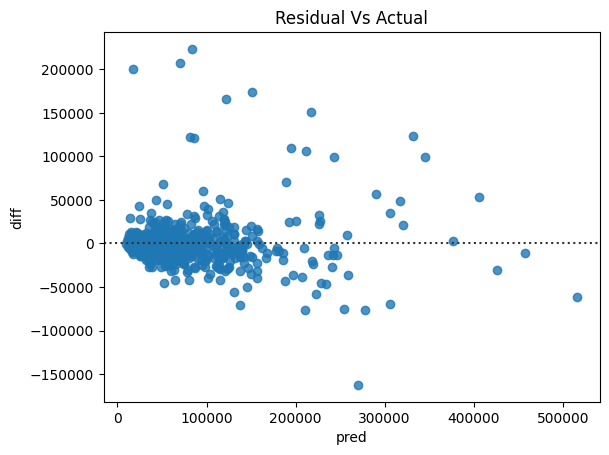

In [23]:
sns.residplot(data=df_log_xgb, x='pred', y='diff').set(title='Residual Vs Actual')
plt.show()

In [24]:
df_log_xgb['diff'].max()

226502.8125

<Axes: xlabel='diff'>

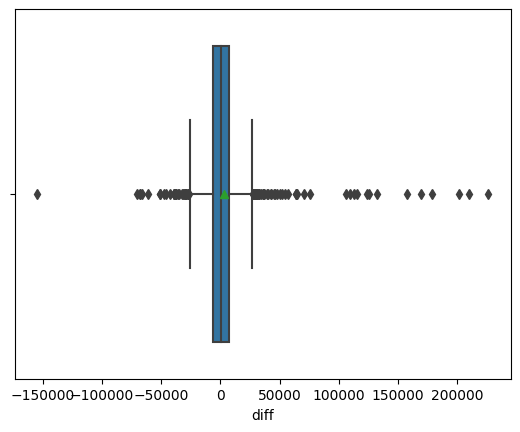

In [34]:
sns.boxplot(data=df_log_xgb, x='diff', showmeans=True)

In [30]:
q1, q3 = df_log_xgb['diff'].quantile([0.25, 0.75])
iqr = q3 - q1
lowBound = q1-1.5*iqr
upBound =  q3+1.5*iqr

upBound

26891.05419921875

In [31]:
idOutUp = df_log_xgb[df_log_xgb['diff'] > 50000].index
idOutUp

Index([1770, 1125, 1153, 3481,  433,  360, 3403, 2013, 3329, 1463, 2000, 3434,
       2124,  795, 1727, 3290,  485, 1617, 2422, 1795, 1946, 1443],
      dtype='int64')

In [32]:
df.describe()

,index,Year,Engine_Size,Mileage,Price
count,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000
mean,2805.314706,2014.829679,3.187567,128656.366578,79613.078342
std,1617.143654,5.075427,1.461262,110962.314844,72728.051902
min,1.000000,1963.000000,1.000000,100.000000,5000.000000
25%,1410.500000,2013.000000,2.000000,49000.000000,36500.000000
50%,2787.000000,2016.000000,2.700000,104000.000000,59000.000000
75%,4204.750000,2018.000000,4.000000,183000.000000,95000.000000
max,5622.000000,2021.000000,9.000000,900000.000000,850000.000000


In [33]:
resid = df.copy().filter(items=idOutUp, axis=0)
display(resid.describe(), resid.describe(include=object))

,index,Year,Engine_Size,Mileage,Price
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2839.545455,2015.545455,3.900000,77062.818182,287068.181818
std,1498.294895,8.765339,1.628613,110452.840951,108155.784410
min,556.000000,1980.000000,1.400000,2300.000000,95000.000000
25%,1848.000000,2013.500000,3.000000,6750.000000,207750.000000
50%,2653.000000,2019.000000,3.500000,32000.000000,300750.000000
75%,3501.500000,2020.000000,5.000000,86750.000000,353750.000000
max,5246.000000,2021.000000,8.000000,455000.000000,470000.000000


,Type,Region,Make,Gear_Type,Origin,Options
count,22,22,22,22,22,22
unique,16,8,12,2,3,3
top,Other,Riyadh,Mercedes,Automatic,Saudi,Full
freq,3,10,3,19,13,16


### **Interpretation**

#### **Feature Importances**

#### **Model Limitation**

# `Conclusion`

# `Recommendation`